Write Python code that can create a CSV containing 10 columns of text data​.<br>
Each entry should be between 5 and 20 characters​.<br>
Generate  files of size {0.1, 1, 5, 10, 100, 500} MB of data​.<br>
Measure how much time it takes to write the files to disk. Do not include the time used in creating the random entries.​<br>
Repeat the above test three times​.<br>
Measure how much time it takes for your computer to load the data into a Pandas dataframe.​<br>
Plot both the write times and load times versus file size​.<br>
​<br>
Submit your python notebook (.ipynb file) containing the code for the experiment and the results. Results are a table of values and plots. ​<br>

In [1]:
# from sys import getsizeof
import pandas as pd
import random
import string
from time import time
import os
import matplotlib.pyplot as plt

%matplotlib inline

MIN_LENGTH = 5
MAX_LENGTH = 20

In [2]:
def getsizeof(text):
    return len(text) 

In [3]:
def rand_string(N=10):
    return ''.join(random.choices(string.ascii_letters, k=N))

#rand_string()

In [4]:
def create_a_line(columns=10):
    return ','.join([ rand_string(random.randint(MIN_LENGTH,MAX_LENGTH)) for _ in range(columns)])

#create_a_line()

In [5]:
def mb_to_byte(mb):
    return mb* 1048576

def byte_to_mb(byte):
    return byte/1048576

In [6]:
def create_str_size_of(size=1, data=None): #size in mb
    size = mb_to_byte(size) 
    text = ""
    
    if (data!=None):
        data_size = getsizeof(data)
        times = int(size / data_size)+1
        #print (times)
        text = data * times
    
    while(getsizeof(text) < size):
        line = create_a_line()
        text += line + '\n'
        
    return text

#getsizeof(create_str_size_of(1))

In [7]:
def write_to_file(text, filename):
    with open( filename, 'w') as file:
        file.write(text)

#write_to_file('blah,blah', 'test.csv')

In [8]:
def read_from_csv(filename):
    return pd.read_csv(filename)

def get_filesize(filename):
    return os.path.getsize(filename)

In [9]:
mbs = [0.1,1,5,10,100,500]

def run_tests_for(mbs_list = mbs):
    write_secs = []
    read_secs = []
    actual_filesize_list = []
    
    data = None
    for mb in mbs_list:
        print ('-for ' , mb , 'mb')
        filename = 'file_' + str(mb).replace('.','_') + '.csv'

        data = create_str_size_of(mb, data)
        #writing
        start = time()
        write_to_file(data, filename)
        elapsed_write = time() - start
        print('Write Time for {} mb is {} seconds'.format(mb, elapsed_write))
        write_secs.append(elapsed_write)
        
        #reading
        start = time()
        _ = read_from_csv(filename)
        elapsed_read = time() - start
        print('Read Time for {} mb is {} seconds'.format(mb, elapsed_read))
        read_secs.append(elapsed_read)
        
        actual_file_size = get_filesize(filename)
        #print (actual_file_size)
        actual_filesize_list.append(byte_to_mb(actual_file_size))
        
    stats = pd.DataFrame({
        'MB': mbs_list,
        'Write': write_secs,
        'Read': read_secs,
        'Actual Size': actual_filesize_list
    })
    return stats

#stats = run_tests_for()
#stats

In [10]:
def calculate_average_times(run_times=3):
    stats = pd.DataFrame()
    start = time()
    for i in range(run_times):
        print('Run: ', i+1)
        test_stats = run_tests_for()
        stats = pd.concat([stats, test_stats])
        print('----------------------')

    total_elapsed = time()-start
    print ('Total elapsed time {} seconds'.format(total_elapsed))

    stats = stats.groupby(['MB']).mean()
    stats = stats.reset_index()
    
    return stats

In [11]:
def draw_graph(stats):
    read_ax = plt.plot(stats['MB'],stats['Read'])
    write_ax = plt.plot(stats['MB'],stats['Write'])
    plt.legend( ['Read', 'Write'])
    plt.xlabel('File Size in MB')
    plt.ylabel('Time in seconds')
    
# draw_graph(stats)

In [12]:
stats = calculate_average_times()

Run:  1
-for  0.1 mb
Write Time for 0.1 mb is 0.0006129741668701172 seconds
Read Time for 0.1 mb is 0.0069119930267333984 seconds
-for  1 mb
Write Time for 1 mb is 0.0010852813720703125 seconds
Read Time for 1 mb is 0.018918991088867188 seconds
-for  5 mb
Write Time for 5 mb is 0.004251956939697266 seconds
Read Time for 5 mb is 0.0819249153137207 seconds
-for  10 mb
Write Time for 10 mb is 0.016269207000732422 seconds
Read Time for 10 mb is 0.14171385765075684 seconds
-for  100 mb
Write Time for 100 mb is 0.11493396759033203 seconds
Read Time for 100 mb is 1.1351120471954346 seconds
-for  500 mb
Write Time for 500 mb is 0.633540153503418 seconds
Read Time for 500 mb is 5.924921035766602 seconds
----------------------
Run:  2
-for  0.1 mb
Write Time for 0.1 mb is 0.0006289482116699219 seconds
Read Time for 0.1 mb is 0.004091739654541016 seconds
-for  1 mb
Write Time for 1 mb is 0.0010728836059570312 seconds
Read Time for 1 mb is 0.014867782592773438 seconds
-for  5 mb
Write Time for 5 m

In [13]:
stats

,MB,Write,Read,Actual Size
0,0.1,0.000633,0.005251,0.100065
1,1.0,0.001033,0.016964,1.000649
2,5.0,0.003841,0.077354,5.003246
3,10.0,0.012144,0.142186,10.006491
4,100.0,0.110177,1.222728,100.064913
5,500.0,0.616111,6.082416,500.324567


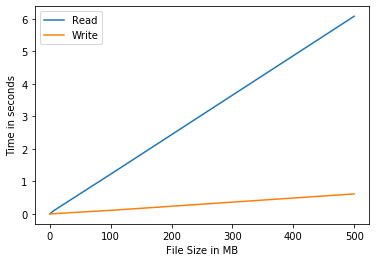

In [14]:
draw_graph(stats)

In [16]:
# !rm file*.csv